<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0518/0518_3_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%92%E1%85%A2(Logistic_Regression)(%EC%88%98%EC%97%85%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

#Binary Classification

## 1) 가상 데이터로 실습하기

### 1.1 가상 데이터 생성

이름에 Regression이 들어가지만 회귀가 아닌 분류 모델임을 명심하자.

make_classification 함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다.  
* 주요 parameter:
 - `n_samples` : data의 수, 기본값은 100  
 - `n_features` : feature의 수, 기본값은 20  
 - `n_informative` : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2  
 - `n_redundant` : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2  
 - `n_repeated` : 중복되는 독립변수의 수, 기본값은 0, 독립변수란 입력값 X를 말한다.   
 - `n_classes` : 종속변수의 class 수, 기본값은 2  
 - `n_clusters_per_class` : 각 클래스당 클러스터 수, 기본값은 2  
        클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다.  
        주의 사항으로 n_classes * n_clusters_per_class는 2 ** n_informative보다 작거나 같게 설정해야 한다.)
 - `random_state` : 난수  
        난수값을 다르게하면 각자 다른 형태의 데이터가 나오게 된다.
        (데이터를 반복적으로 생성할 때 동일한 데이터를 얻기 위해 사용한다.)

* 반환값:
 - `X` : [n_samples, n_features] 크기의 배열 
 - `y` : [n_samples] 크기의 배열

참고 : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification


In [ ]:
# 1000개의 데이터(sample), 2개의 특성(feature)을 가진 분류용 데이터 셋을 생성해보자.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 2, n_clusters_per_class = 1, n_informative = 2,
                           n_redundant = 0, n_repeated = 0, n_classes = 2, random_state = 0)

In [ ]:
# 가상으로 생성한 X, y의 type, shape를 확인해보자
print('X type :   ', type(X))
print('X shape    ', X.shape)
print('-'*50)
print('y type :   ', type(y))
print('y shape    ', y.shape)

X type :    <class 'numpy.ndarray'>
X shape     (1000, 2)
--------------------------------------------------
y type :    <class 'numpy.ndarray'>
y shape     (1000,)


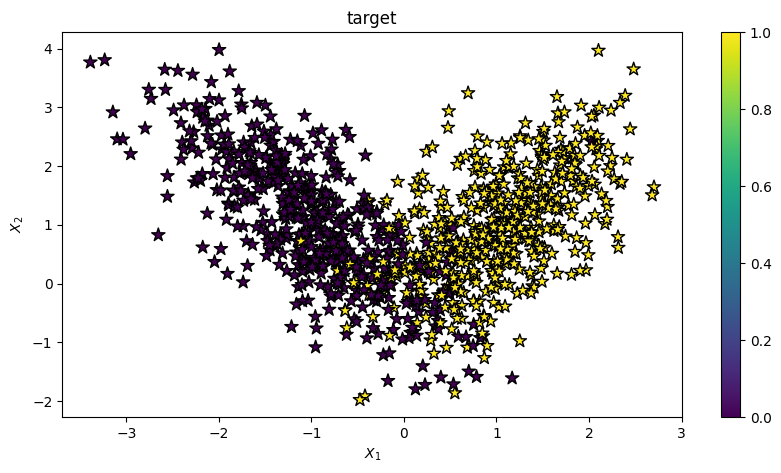

In [ ]:
# 이번에는 그래프로 데이터를 살펴보자.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 100, edgecolors = 'k')
plt.title('target')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

In [ ]:
# 랜덤 데이터 셋을 DataFrame으로 변환시켜 확인해보자.
import pandas as pd

x_random = pd.DataFrame(X, columns=[f'X{i}' for i in range(1,3)])
y_random = pd.DataFrame(y, columns=['target'])
df_random = pd.concat([x_random, y_random], axis=1)

# 데이터프레임을 출력시켜보자.
df_random

,X1,X2,target
0,-0.400228,-0.926880,0
1,1.076102,1.180291,1
2,-0.922953,0.306167,0
3,0.897991,2.407370,1
4,1.506738,2.583626,1
...,...,...,...
995,1.312801,1.140114,1
996,1.341010,1.225572,1
997,-2.376740,3.037290,0
998,-1.077262,1.453976,0


아래 그림과 같이 2개의 feature를 가진 데이터를 input하여 0과 1로 이루어진 output을 반환하는 Logistic Regression을 생성해보자 

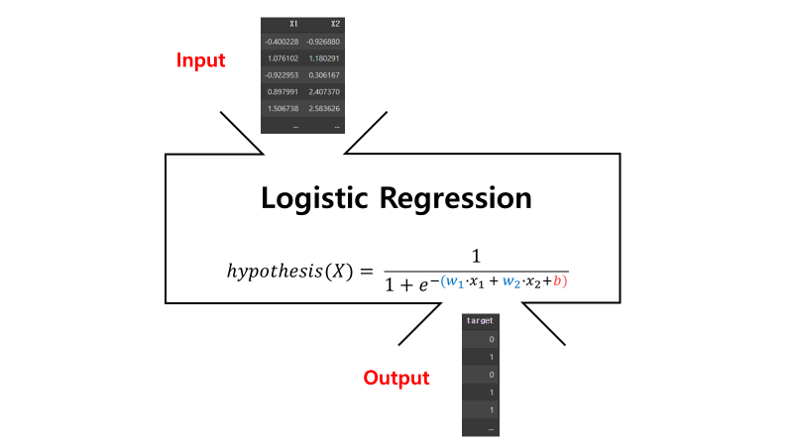

### 1.2 모델링

LogisticRegression
* 주요 parameter:
 - `penalty` : regularization의 유형, 기본값은 l2  
 - `C` : regularization의 강도의 역수, 기본값은 1
        C가 높을 수록 규제강도는 낮아진다.   
 - `fit_intercept` : 최종분류함수에 상수항 포함 여부, 기본값은 True  
 - `solver` : 최적화에 사용할 알고리즘['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 기본값은 'lbfgs'
 - `max_iter` : solver가 수렴하게 만드는 최대 반복 횟수 값, 기본값은 100
 - `multi_class` : 종속변수의 class 유형('auto', 'ovr', 'multinomial'), 기본값은 'auto' 
 - `random_state` : 난수 발생
        난수값을 다르게하면 각자 다른 형태의 데이터가 나오게 된다.
        (데이터를 반복적으로 생성할 때 동일한 데이터를 얻기 위해 사용한다.)


참고 : [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 8:2의 비율로 가상의 데이터를 학습용 데이터(train data), 평가용 데이터(test data)로 나누어 보자.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify=y, random_state = 0)

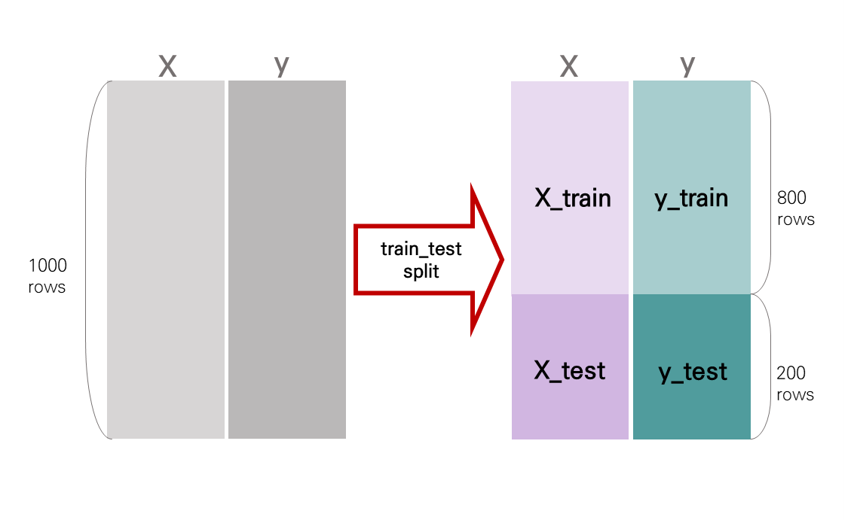

In [ ]:
# model_logic이라는 변수에 LogisticRegression 모델을 생성한 후 train데이터로 학습
model_logic = LogisticRegression(random_state = 0)
model_logic.fit(X_train, y_train)

LogisticRegression(random_state=0)

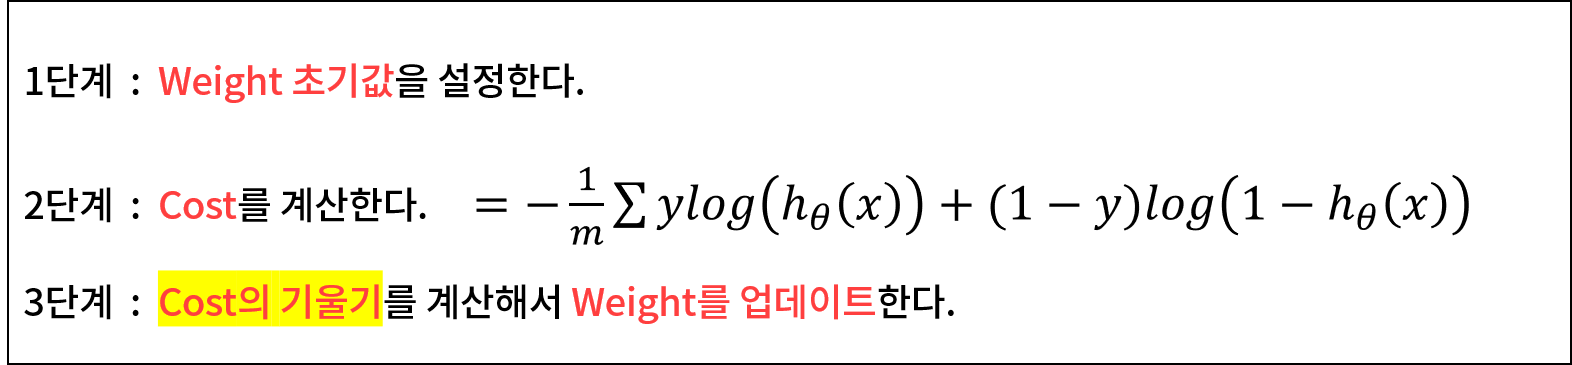

In [ ]:
# 학습된 모델에서 생성된 feature의 weight와 bias 확인해보자
print('weight : {}\n'.format(model_logic.coef_))
print('bias :   {}'.format(model_logic.intercept_))

weight : [[3.4642066  0.50625641]]

bias :   [-0.28653514]


In [ ]:
# predict로 예측할 수 있다.
model_logic.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1])

In [ ]:
# 실제데이터
y_test

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1])

In [ ]:
# predict_proba를 통해 모델이 예측한 클래스별 확률을 확인할 수 있다.
model_logic.predict_proba(X_test) # proba 확률, 이걸 토대로 임계값 설정

array([[7.02655270e-01, 2.97344730e-01],
       [3.67098865e-03, 9.96329011e-01],
       [9.17028600e-01, 8.29713996e-02],
       [1.49559641e-03, 9.98504404e-01],
       [1.83355091e-01, 8.16644909e-01],
       [9.97699385e-01, 2.30061452e-03],
       [5.91187285e-01, 4.08812715e-01],
       [5.40900970e-03, 9.94590990e-01],
       [9.88906171e-01, 1.10938288e-02],
       [1.39339286e-03, 9.98606607e-01],
       [9.87089745e-01, 1.29102550e-02],
       [9.99917372e-01, 8.26281883e-05],
       [6.46075029e-02, 9.35392497e-01],
       [2.44770516e-04, 9.99755229e-01],
       [4.98650575e-02, 9.50134943e-01],
       [1.55537320e-02, 9.84446268e-01],
       [9.91725519e-01, 8.27448128e-03],
       [4.19731011e-01, 5.80268989e-01],
       [1.37361058e-03, 9.98626389e-01],
       [9.34752069e-01, 6.52479312e-02],
       [9.85760934e-01, 1.42390656e-02],
       [8.32625806e-01, 1.67374194e-01],
       [1.96902999e-01, 8.03097001e-01],
       [1.04465544e-02, 9.89553446e-01],
       [9.931772

### 1.3 평가


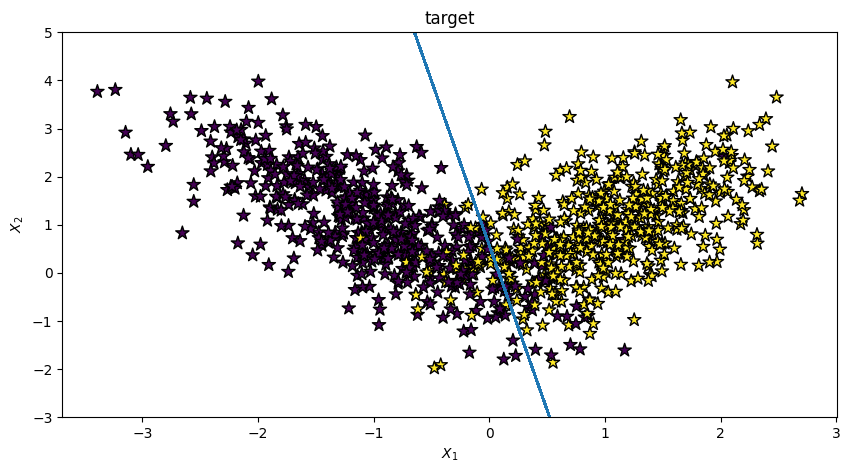

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 100, edgecolors = 'k')
plt.title('target')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

W = model_logic.coef_

X_2 = -(W[0][0]*X[:, 0] + model_logic.intercept_[0]) / W[0][1]
plt.plot(X[:, 0], X_2)

plt.ylim(-3, 5)
plt.show()

score()
*  score() 명령어를 통해 모델 성능을 평가할 수 있다.
*  LogisticRegression은 기본적으로 Acurracy 를 반환해준다.
        Accuracy(= 정확도) = 예측 결과와 실제 결과가 동일한 데이터 수 / 전체 데이터 수
        실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

In [ ]:
model_logic.score(X_train, y_train)

In [ ]:
from

In [ ]:
# train 데이터 분류정확도, test 데이터 분류정확도 확인
print('train score : {:.3f}\n'.format(model_logic.score(X_train, y_train)))
print('test score :  {:.3f}'.format(model_logic.score(X_test, y_test)))

train score : 0.917

test score :  0.920


우리가 생성한 모델의 학습데이터의 분류 정확도는 0.916, 평가데이터의 분류 정확도는 0.935 임을 확인할 수 있다.

정확도를 통해 누구나 직관적으로 분류 모델의 성능을 평가할 수 있다. 하지만 분류 모델의 경우 정확도만을 가지고 성능을 평가하기엔 적절하지 않다. 데이터의 구성에 따라 모델의 성능이 왜곡될 수 있기 때문이다.  
왜 그런지 알아보자.

In [ ]:
# 기존에 생성한 가상데이터의 클래스 비율을 확인해보자.
# value_counts()는 칼럼별로 각각의 고유값(unique value)이 몇 개가 있는지 확인해주는 method다. 
df_random['target'].value_counts()

0    501
1    499
Name: target, dtype: int64

기존에 생성한 데이터의 경우 '0'와 '1' 클래스가 균등하게 존재하는 것을 확인할 수 있다.  
이번에는 make_classification에서 생성되는 클래스의 비율을 조정할 수 있는 `weights` 파라미터 옵션을 넣어보자. 

In [ ]:
# 기존에 parameter에서 weights 만 추가하여 새로운 가상 데이터를 생성해보자.
# weights = [0.95, 0.05] 은 '0'과 '1' 클래스의 비율을 약 95:5로 생성한다는 뜻이다.
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
X2, y2 = make_classification(n_samples = 1000, n_features = 2, n_clusters_per_class = 1, n_informative = 2, weights = [0.95, 0.05],
                           n_redundant = 0, n_repeated = 0, n_classes = 2, random_state = 0)

In [ ]:
# 새롭게 생성한 가상데이터의 클래스 비율을 확인해보자.
pd.DataFrame(y2).value_counts()

0    944
1     56
dtype: int64

weigths 파라미터를 추가하여 생성한 데이터의 경우 '0'과 '1' 클래스가 약 95:5의 비율로 불균형하게 생성되었다.  
새롭게 생성된 가상데이터에 대해 Logistic Regression 모델 생성 후 예측 정확도를 평가해보자.

In [ ]:
# 앞선 모델링 코드와 같으니 분류정확도가 어떻게 나오는지 집중하여 확인해보자.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 이전과 동일하게 8:2의 비율로 가상의 데이터를 학습용 데이터(train data), 평가용 데이터(test data)로 분리
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, shuffle = True, random_state = 0)

# model2_logic이라는 변수에 LogisticRegression 모델을 생성한 후 train데이터로 학습
model2_logic = LogisticRegression(random_state = 0)
model2_logic.fit(X2_train, y2_train)

# train 데이터 분류정확도, test 데이터 분류정확도 확인
print('train score : {:.3f}\n'.format(model2_logic.score(X2_train, y2_train)))
print('test score :  {:.3f}'.format(model2_logic.score(X2_test, y2_test)))

train score : 0.978

test score :  0.970


새로운 데이터로 학습한 경우 분류정확도가 더 상승했다.  
그렇다면 새롭게 생성한 Logistic Regression 모델이 기존 모델보다 더 좋은 모델이라고 평가할 수 있을까?

만약 불균형하게 생성된 데이터에 대해 머신러닝 모델을 생성하지 않고 무조건 가장 많이 분포되어 있는 클래스로 예측하는 경우는 어떨까?  
어떤 input 값이 들어오더라도 무조건 '0' 클래스의 output을 반환하는 매우 단순한 알고리즘을 생각해보자.  
위에서 생성된 가상 데이터의 경우 '0' 클래스가 전체 데이터의 약 95%를 차지했으므로 놀랍게도 이 알고리즘의 정확도는 95%가 된다.

하지만 누구라도 이와 같은 단순한 알고리즘이 ML으로 생성한 분류모델과 비슷한 성능을 보인다고 평가할 수는 없을 것이다.  
결국 불균형한 클래스를 가진 데이터 세트에서는 정확도만을 평가지표로 사용하는 것이 적절하지 않다.

분류 평가 지표로서 정확도가 가지는 한계점을 극복하기 위해 오차행렬(Confusion Matrix), 정밀도(Precision), 재현율(Recall), F1스코어, ROC_AUC 에 대해 알아보자.

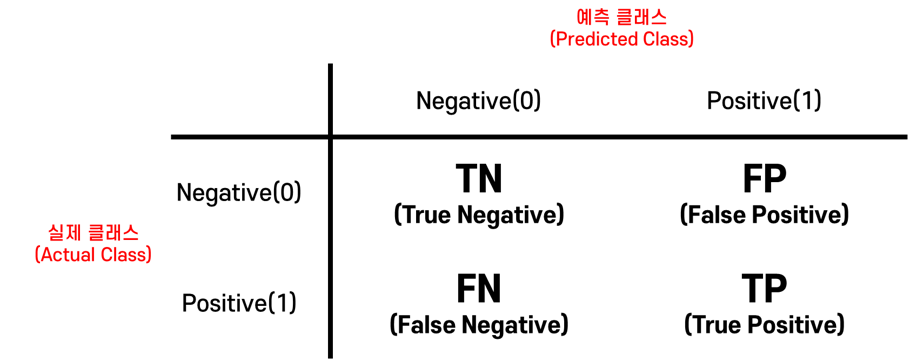

오차행렬(Confusion Matrix)  

        오차행렬은 위의 그림과 같은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타낸다.
        - TN : 예측값을 Negative(0)로 예측했고 실제 값 역시 Negative(0)
        - FP : 예측값을 Positive(1)로 예측했는데 실제 값은 Negative(0)
        - FN : 예측값을 Negative(0)로 예측했는데 실제 값은 Positive(1)
        - TP : 예측값을 Positive(1)로 예측했고 실제 값 역시 Positive(1)

오차행렬을 기반으로 분류 성능을 측정할 수 있는 주요 평가지표를 알 수 있으므로 반드시 정확한 개념을 이해하자.



[링크 텍스트]정확도(Accuracy)  

        예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수
        = (TN + TP) / (TN + FP + FN + TP)
- 정확도는 예측값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정된다.
- 하지만, 앞서 소개했듯이 불균형한 데이터 세트엣 정확도만으로는 모델의 신뢰도가 떨어질 수 있다.

정밀도(Precision)  

        예측을 Positive(1)로 한 대상 중에 예측과 실제 값이 Positive(1)로 일치한 데이터의 비율
        = TP / (FP + TP)


재현율(Recall)  

        실제 값이 Positive(1)인 대상 중에 예측과 실제 값이 Positive(1)로 일치한 데이터의 비율
        = TP / (FN + TP)



이진 분류 모델의 업무 특성에 따라 정밀도와 재현율 중 하나의 지표가 더 중요한 지표로 간주될 수 있다.
- 정밀도 중요: 실제 Negative(0) 데이터를 Positive(1)로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우  
    - ex) 스팸 메일 분류(스팸 메일 = 1, 일반 메일 = 0):
    - 실제 스팸메일(1)을 일반메일(0)으로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 일반메일(0)을 스팸메일(1)로 분류할 경우 메일을 수신하지 못해 업무에 차질이 생길 수 있다.

- 재현율 중요: 실제 Positive(1) 데이터를 Negative(0)으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - ex) 금융 사기 적발(사기 거래 = 1, 정상 거래 = 0):
    - 실제 정상 거래를(0)을 사기 거래(1)로 분류하더라도 다시한번 금융 사기인지 재확인하는 절차를 거치면 되지만, 실제 사기 거래(1)를 정상 거래(0)으로 분류하게 되면 회사에 큰 손해를 미친다.

재현율과 정밀도의 공식을 다시 살펴보면, 재현율과 정밀도 모두 분자에 위치한 TP를 높이는데 초점을 맞춘다.  
하지만 분모를 보면 재현율은 FN을 낮출수록, 정밀도는 FP를 낮출수록 점수가 높아질 수 밖에 없다.  
즉, 재현율은 잘못된 Negative(0) 예측을 없애기 위해 Negative(0)로 예측하는 경우를 줄이고 모든 데이터를 Positive(1)로 예측할 수록 점수가 올라가며, 정밀도는 잘못된 Positive(1) 예측을 없애기 위해 Positive(1)가 거의 확실한 경우만 Positive(1)로 예측하고 나머지는 모두 Negative(0)로 예측할 수록 점수가 상승한다.  
따라서, 정밀도와 재현율 성능 수치도 어느 한쪽만 참조하면 극단적인 수치 조작이 가능하므로 정밀도와 재현율 중 하나만 참조하여 분류 모델의 성능을 평가해서는 안된다.

F1 스코어  

        F1 스코어는 정밀도와 재현율을 결합한 지표이다.
        정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.
        = 2 / {(1 / recall) + (1 / precision)}
        = 2 * (precision * recall) / (precision + recall) 

ROC(Receiver Operation Characteristic) 곡선  

        FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변화하는지를 나타내는 곡선
        TPR은 앞에서 소개한 재현율과 동일하며 재현율을 민감도라고도 불린다.
        민감도에 대응하는 지표로 TNR(True Negative Rate)이라고 불리는 특이성이 있는데 즉 실제 값이 Negative(0)인 대상 중에 예측과 실제 값이 Negative(0)로 일치한 데이터의 비율(= TN / (FP + TN))을 말한다.
        FPR은 1 - TNR

- ROC곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구한다.
- 일반적으로 ROC곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용하며 실제 분류의 성능 지표로 사용되는 것은 ROC곡선의 면적에 기반한 AUC 값이다.


AUC(Area Under Curve)  

        AUC 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다.
        가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할 수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 AUC 성능 수치를 얻게 된다.
        가운데 대각선 직선은 랜덤 수준의 이진 분류 AUC값인 0.5 의 값을 가진다.(AUC의 최솟값)



<a title="MartinThoma, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Roc-draft-xkcd-style.svg"><img width="512" alt="Roc-draft-xkcd-style" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/512px-Roc-draft-xkcd-style.svg.png"></a>  

출처 : <a href="https://commons.wikimedia.org/wiki/File:Roc-draft-xkcd-style.svg">MartinThoma</a>, CC0, via Wikimedia Commons


In [ ]:
# 앞서 소개한 분류 평가지표로 모델을 다시 평가해보자.
# 먼저 0과 1 클래스의 비율이 동일한 데이터셋으로 학습한 모델을 평가해보자.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# roc_auc는 예측 클래스값이 아닌 예측 확률값을 기반으로 계산되므로 positive(1)로 예측할 확률값인 pred_proba 변수를 생성해준다.
pred = model_logic.predict(X_test)
pred_proba = model_logic.predict_proba(X_test)[:,1]
print('오차행렬:\n', confusion_matrix(y_test, pred))
print('정확도:  ', accuracy_score(y_test, pred))
print('정밀도:  ', precision_score(y_test, pred))
print('재현율:  ', recall_score(y_test, pred))
print('F1 스코어:   ', f1_score(y_test, pred))
print('ROC_AUC: ', roc_auc_score(y_test, pred_proba))

오차행렬:
 [[91  9]
 [ 7 93]]
정확도:   0.92
정밀도:   0.9117647058823529
재현율:   0.93
F1 스코어:    0.9207920792079208
ROC_AUC:  0.9709000000000001


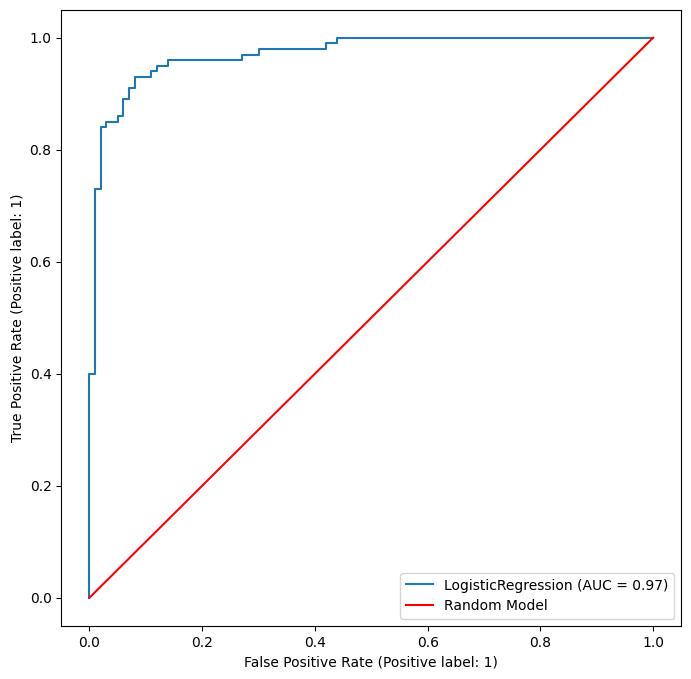

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(model_logic, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red', label='Random Model')
ax.legend()
plt.show()

In [ ]:
# 이번에는 불균형한 데이터셋으로 학습한 분류 모델의 성능을 평가해보자.
pred2 = model2_logic.predict(X2_test)
pred2_proba = model2_logic.predict_proba(X2_test)[:,1]
print('오차행렬:\n', confusion_matrix(y2_test, pred2))
print('정확도:  ', accuracy_score(y2_test, pred2))
print('정밀도:  ', precision_score(y2_test, pred2))
print('재현율:  ', recall_score(y2_test, pred2))
print('F1 스코어:   ', f1_score(y2_test, pred2))
print('ROC_AUC: ', roc_auc_score(y2_test, pred2_proba))

오차행렬:
 [[189   0]
 [  6   5]]
정확도:   0.97
정밀도:   1.0
재현율:   0.45454545454545453
F1 스코어:    0.625
ROC_AUC:  0.9567099567099566


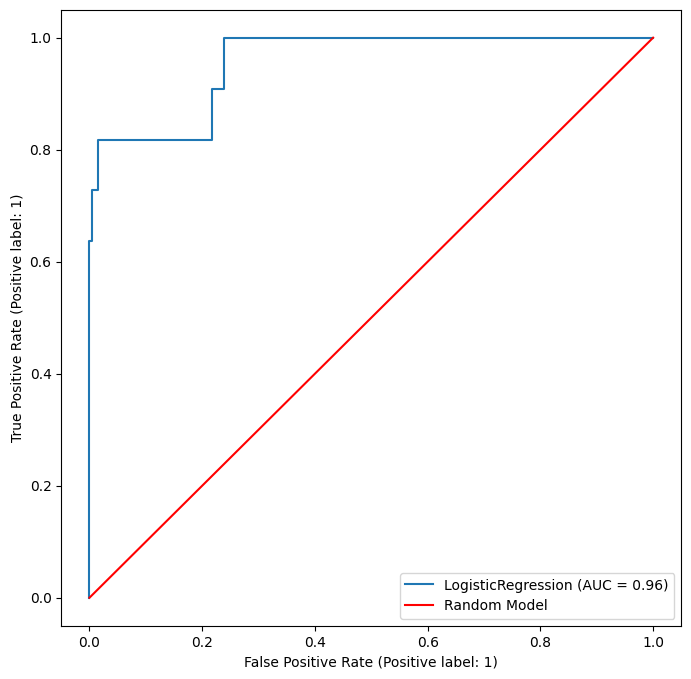

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(model2_logic, X2_test, y2_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red', label='Random Model')
ax.legend()
plt.show()

첫번째 분류모델에 비해 두번째 분류모델의 정확도와 정밀도가 높지만, 재현율과 F1스코어, ROC_AUC 점수는 낮음을 확인할 수 있다.  
즉, 두번째 모델은 불균형한 클래스의 데이터로 인해 대부분의 데이터에 대해 Negative(0)으로 분류하여 실제 Positive(1)을 정확하게 분류해내지 못하는 모델이라고 할 수 있다.

### 1.4 regularization

이번에는 앞서 Overfitting(과적합)을 피하기 위해 Linear Regression에 적용한 regularizaion을 Logistic Regression에도 적용해보자

LogisticRegression
* 주요 regularization parameter
 - `penalty` : regularization의 유형, 기본값은 l2  
 - `C` : regularization의 강도의 역수, 기본값은 1
        C가 높을 수록 규제강도는 낮아진다.   


참고 : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression

In [ ]:
# 1000개의 데이터(sample), 30개의 특성(feature)을 가진 분류용 데이터 셋을 생성해보자.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 30, n_clusters_per_class = 1, n_informative = 10,
                           n_redundant = 5, n_repeated = 3, n_classes = 2, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=0)

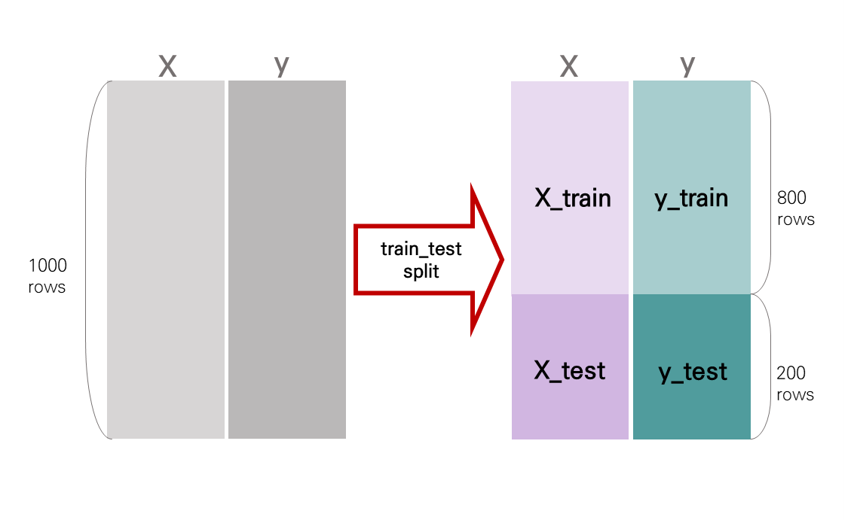

In [ ]:
# C로 규제강도를 정해줄 수 있다. 기본값은 1.0 이다.
# C의 값이 높아지면 규제가 감소하게 된다. 즉 C의 값을 높이면 데이터를 정확하게 분류하려고 한다.
# 너무 정확하게 분류하면 과적합(overfitting) 될 수 있으니 주의하자.
reg_1 = LogisticRegression(C = 1.0, random_state=0)
reg_1.fit(X_train, y_train)

print('train score : {:.4f}\n'.format(reg_1.score(X_train, y_train)))
print('test score : {:.4f}'.format(reg_1.score(X_test, y_test)))

train score : 0.9762

test score : 0.9250


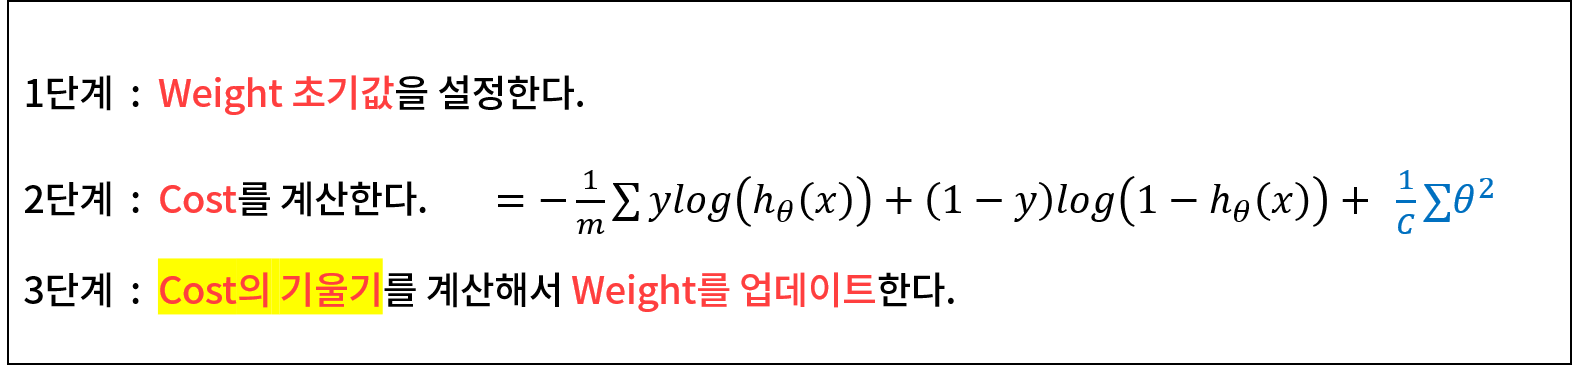

In [ ]:
# C = 10 일 때 (C=1에 비해 약한 규제)
reg_10 = LogisticRegression(C = 10, random_state=0)
reg_10.fit(X_train, y_train)

print('train score : {:.4f}\n'.format(reg_10.score(X_train, y_train)))
print('test score : {:.4f}'.format(reg_10.score(X_test, y_test)))

train score : 0.9788

test score : 0.9200


약간의 차이지만 C 값이 증가할때(규제가 약할때) train 데이터의 정확도는 상승한 반면, test 데이터의 정확도는 하락한 것을 확인할 수 있다.



In [ ]:
# C = 0.1 일 때 (C=1에 비해 강한 규제)
reg_001 = LogisticRegression(C = 0.1, random_state=0).fit(X_train, y_train)

print('train score : {:.4f}\n'.format(reg_001.score(X_train, y_train)))
print('test score : {:.4f}'.format(reg_001.score(X_test, y_test)))

train score : 0.9738

test score : 0.9400


반대로 C 값이 감소할때(규제가 강할때) train 데이터의 정확도는 하락한 반면, test 데이터의 정확도는 상승한 것을 확인할 수 있다.

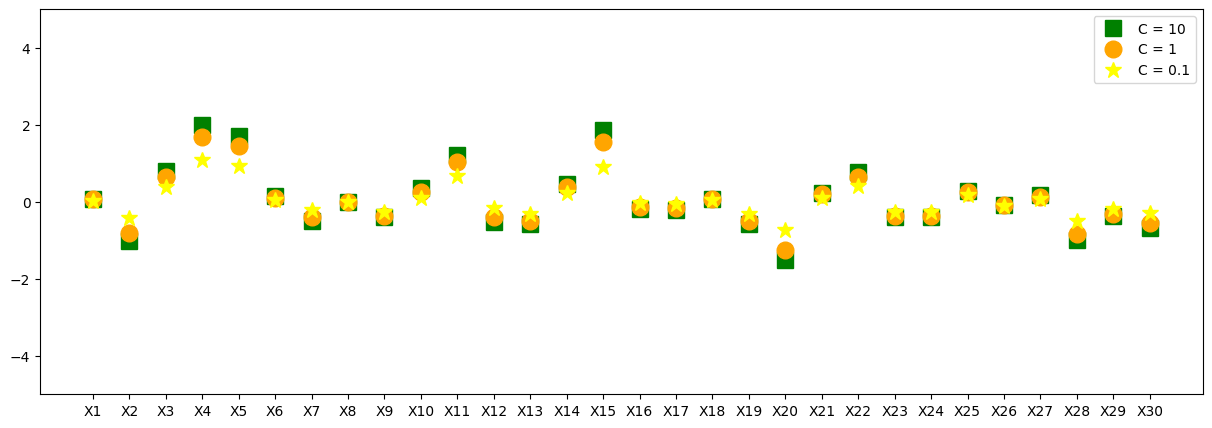

In [ ]:
# C의 변화에 따른 계수의 변화
plt.figure(figsize = (15,5))
plt.plot(reg_10.coef_.T, 's', label = 'C = 10', markersize = 12, c = 'green')
plt.plot(reg_1.coef_.T, 'o', label = 'C = 1', markersize = 12, c = 'orange')
plt.plot(reg_001.coef_.T, '*', label = 'C = 0.1', markersize = 12, c = 'yellow')
plt.xticks(range(X_train.shape[1]), [f'X{i}' for i in range(1,31)])
plt.ylim(-5, 5)
plt.legend()
plt.show()

각 feature별weight(가중치)값 역시 C의 값이 증가할수록(규제가 약할수록) 커지는 것을 확인할 수 있다.

C의 값이 높아지면 규제가 감소하게 된다.  
즉, C의 값을 높이면 학습데이터를 정확하게 분류하려고 한다.  
하지만 학습데이터만을 너무 정확하게 분류하면 과적합(overfitting) 될 가능성이 높다.  
따라서, Logistic Regression 역시 과적합을 피하기 위해 적절한 parameter를 설정하는 것이 중요하다.

## 2) 유방암 데이터로 실습하기

### 2.1 데이터 로드 및 확인

사이킷런에서 제공하는 유방암 데이터셋으로 실제 분류 모델을 만들어보자.

위스콘신 대학교에서 제공한 유방암 진단결과 데이터  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

Logistic Regression 모델을 활용하여 양성종양과 악성종양을 구별해보자.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data_cancer = load_breast_cancer()

# load_breast_cancer()는 dictionary형태의 object를 반환한다.
# 데이터셋의 key들을 확인해보자
data_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data_cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
data_cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**Quiz**

1번. 데이터 수는?  
2번. feature의 수는?  
3번. 클래스의 수는?  
4번. 이 문제는 다중 클래스인가?

In [ ]:
#@title
# Quiz 정답

print(f'1번:    {data_cancer.data.shape[0]}')
print(f'2번:    {data_cancer.data.shape[1]}')
print(f'3번:    {len(data_cancer.target_names)}')
print(f'4번:    No')

569개의 데이터를 가지고 있으며 feature의 개수는 30개 class의 개수는 2개임을 확인할 수 있다.

In [ ]:
# 데이터프레임으로 확인해보자
import pandas as pd

x_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
y_cancer = pd.DataFrame(data_cancer.target, columns=['target'])
df_cancer = pd.concat([x_cancer, y_cancer], axis=1)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 데이터 전처리

In [ ]:
# 모델링

In [ ]:
# 성능평가

#Multinomial Classification

SoftMax Regression을 Multinomial Logistic Regression이라고도 한다.

먼저 다중 클래스를 가진 가상 데이터를 만들어 보자.

## 1) 가상 데이터로 실습하기

### 1.1 가상 데이터 생성

In [ ]:
from sklearn.datasets import make_classification

# n_classes = 3으로 multiclass를 가진 데이터를 생성
X, y = make_classification(n_samples=200, n_features=3, n_redundant = 0,
                           n_classes=3, n_informative=3, random_state = 0)

In [ ]:
# 0, 1, 2 3개의 클래스를 가지고 있다.
y

array([2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0,
       2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2,
       1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2,
       0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       1, 2])

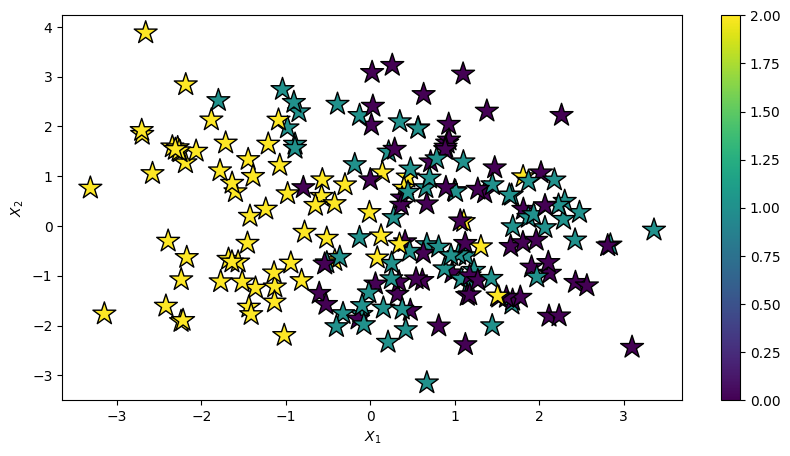

In [ ]:
# 생성된 데이터를 확인해보자
plt.figure(figsize = (10,5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, edgecolors = 'k', s = 300)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

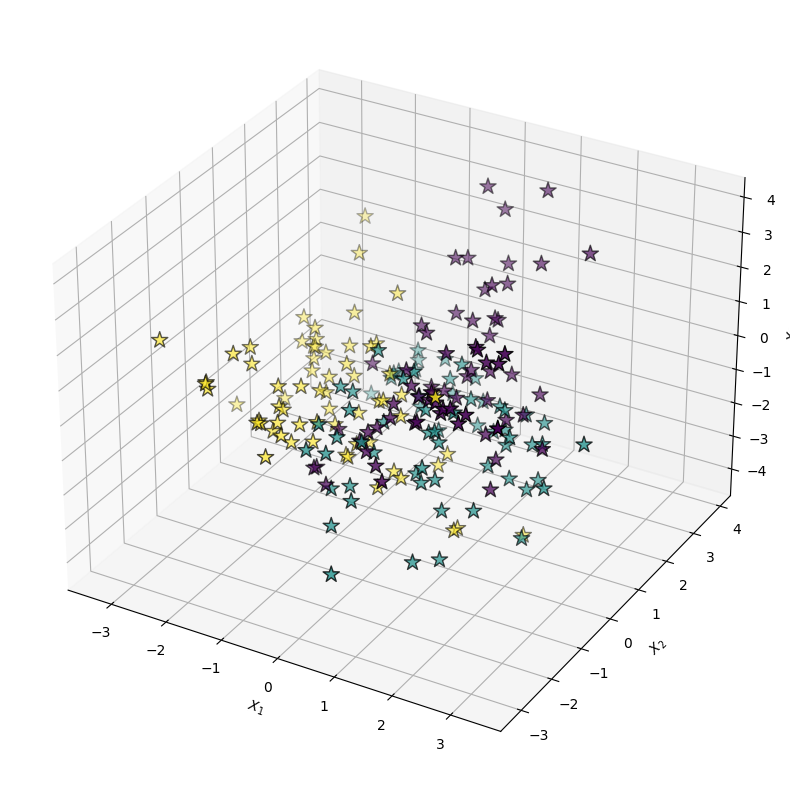

In [ ]:
# 3개의 feature를 모두 나타내기 위해 3차원 그래프로 그려 확인해보자.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker = '*', c = y, edgecolors = 'k', s=150)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$X_3$')
plt.show()

### 2.2 모델링

이진분류 알고리즘을 다중 분류 알고리즘으로 확장하는 보편적인 방법은 일대다(one VS rest)방법이다.  
모든 클래스에 대해 자신과 자신을 제외한 나머지를 분류하는 모델을 만들게 되므로, 결국 클래스의 수만큼 이진분류 모델이 만들어지게 된다.  
(LogisticRegression과 LinearSVC의 `multi_class`매개변수가 'ovr'인 경우 일대다 방법을 말한다.)

#### 2.2.1 일대다 다중분류

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
# LogisticRegrssion의 multi_class 파라미터값을 'ovr'로 설정함 (One Vs Rest)
multi_logistic = LogisticRegression(multi_class='ovr', random_state=0)
multi_logistic.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
print('X_test의 shape : {}\n'.format(X_test.shape))
print('y_test의 shape : {}'.format(y_test.shape))

X_test의 shape : (40, 3)

y_test의 shape : (40,)


test 데이터 개수는 40개 클래스의 수는 3개

In [ ]:
# X_test를 이용해 예측을 해보자.
print('모델 예측 class : \n{}'.format(multi_logistic.predict(X_test)))

모델 예측 class : 
[0 2 0 2 2 0 0 0 0 0 1 0 0 2 2 1 0 1 1 0 0 0 1 1 2 0 1 2 0 1 0 2 2 2 1 2 2
 0 2 2]


In [ ]:
# 실제 class 값
print('실제 class : \n{}'.format(y_test))

실제 class : 
[0 2 0 2 1 0 0 0 0 0 1 0 0 1 2 1 0 1 1 0 1 0 1 1 1 0 0 2 0 2 0 2 0 2 1 2 1
 1 1 1]


- 예측해 본 결과  
  
  1) 데이터 수 :  40개  
  2) 카테고리(클래스) 수 : 0, 1, 2 (3개)

In [ ]:
# 일대다 분류의 성능을 평가해보자.
from sklearn.metrics import confusion_matrix, classification_report

pred_multi = multi_logistic.predict(X_test)

print('train score : {:.3f}'.format(multi_logistic.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(multi_logistic.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred_multi))
print('분류 report:\n', classification_report(y_test, pred_multi, target_names=['class 0', 'class 1', 'class 2']))

train score : 0.750
test score : 0.725

오차행렬:
 [[15  1  1]
 [ 2  7  6]
 [ 0  1  7]]
분류 report:
               precision    recall  f1-score   support

     class 0       0.88      0.88      0.88        17
     class 1       0.78      0.47      0.58        15
     class 2       0.50      0.88      0.64         8

    accuracy                           0.73        40
   macro avg       0.72      0.74      0.70        40
weighted avg       0.77      0.72      0.72        40



사이킷런 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report 명령을 제공한다.

다중 클래스 문제의 경우에는 각각의 클래스에 대해 자신을 를 양성 클래스(1)로, 다른 클래스를 음성 클래스(0)로 가정하여 일대다(OvR) 문제를 풀고 각각에 대해 정밀도, 재현율, F1스코어 등의 평가점수를 구한다. 이렇게 하면 클래스별로 각각 다른 평가점수가 나오므로 이를 하나로 합쳐는 일종의 평균을 구해야 하는데 다음과 같은 여러가지 기준을 사용한다.  
- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
- accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.


참고 : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

#### 2.2.2 softmax 다중분류

지금까지 한 다중분류는 일대다 방식으로 다중분류 한 것이다.  
Softmax로 다중분류를 하고 싶다면 어떻게 해야 할까?

사이킷런의 Logistic Regression은 기본적으로 클래스가 2개 이상이면 일대다 전략을 사용한다.  
그러나 `multi_class` 파라미터를 multinomial로 설정하게 되면 softmax를 사용할 수 있다.  
하지만 softmax를 사용하기 위해서는 softmax를 지원하는 optimization algorithm를 지정해줘야 한다.



**Softmax를 지원하는 solver 파라미터**  

1. lbfgs(limited memory bfgs) : l2규제만 지원해준다.  

    
2. newton_cg(Newton Conjugate Gradient)  : l2규제만 지원해준다, 준 뉴턴 방법처럼 헤시안 행렬을 사용하지않고 변형된 그레디언트 벡터를 계산한다.  
  
    
3. sag(Stochastic Average Gardient Descent - 확률적 평균 경사하강법)  : l2규제만 지원해준다, 데이터셋이 매우 큰 경우에 sag를 사용하면 다른 방법보다 훨씬 빠르게 모델을 학습시킬수 있다, 그러나 스케일에 민감하기 때문에 feature에 스케일링을 잘 해줘야한다.  
  
    
4. saga  : l1, l2 규제 모두 지원한다, sag에서 향상된 버전이다. 






In [ ]:
# LogisticRegrssion의 multi_class 를 'multinomial', solver 를 'lbfgs'로 설정함
softmax_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state=0)

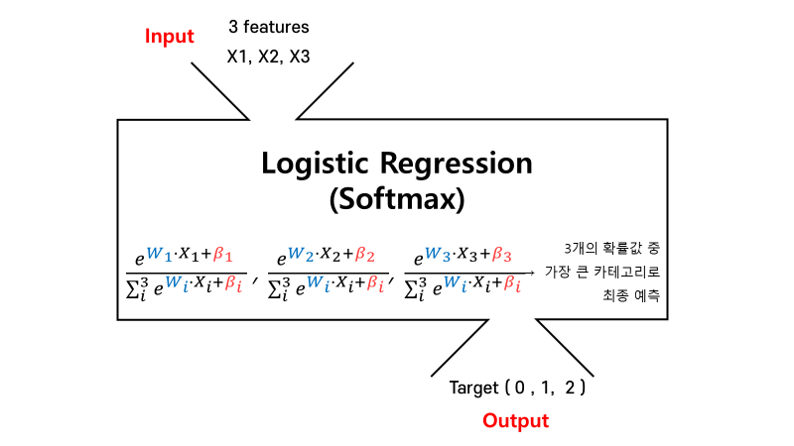

In [ ]:
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
# test 데이터 class 예측
softmax_model.predict(X_test)

array([1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1])

In [ ]:
# softmax 다중분류의 성능을 평가해보자.
from sklearn.metrics import confusion_matrix, classification_report

pred_softmax = softmax_model.predict(X_test)

print('train score : {:.3f}'.format(softmax_model.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(softmax_model.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred_softmax))
print('분류 report:\n', classification_report(y_test, pred_softmax, target_names=['class 0', 'class 1', 'class 2']))

train score : 0.762
test score : 0.750

오차행렬:
 [[14  2  1]
 [ 2  9  4]
 [ 0  1  7]]
분류 report:
               precision    recall  f1-score   support

     class 0       0.88      0.82      0.85        17
     class 1       0.75      0.60      0.67        15
     class 2       0.58      0.88      0.70         8

    accuracy                           0.75        40
   macro avg       0.74      0.77      0.74        40
weighted avg       0.77      0.75      0.75        40



일대다 다중분류에 비해 softmax 다중분류의 성능이 더 높은 경향을 확인할 수 있다.

## 2) 와인 데이터로 실습하기

### 2.1 데이터 로드 및 확인

사이킷런에서 제공하는 와인 데이터셋으로 실제 분류 모델을 만들어보자.

3개의 포도 품종으로 만든 와인의 13개의 외관 및 성분적인 특성(feature) 값을 측정한 데이터

feature  
* `alcohol` : 알콜 도수
* `malic_acid` : 말산
* `ash` : 재
* `alcalinity_of_ash` : 알칼리도
* `magnesium` : 마그네슘
* `total_phenols` : 전체 페놀
* `flavanoids` : 플라보노이드 페놀
* `nonflavanoid_phenols` : 비플라보노이드 페놀
* `proanthocyanins` : 프로안토시아니딘 
* `color_intensity` : 색도
* `hue` : 빛깔, 색조
* `od280/od315_of_diluted_wines` : 희석된 와인의 od280/od315 비율
* `proline` : 프롤린


<a title="Swedish Pavilion at Shanghai Expo 2010, CC BY 2.0 &lt;https://creativecommons.org/licenses/by/2.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Bengt_Frithiofsson_evaluating_wine.jpg"><img width="512" alt="Bengt Frithiofsson evaluating wine" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Bengt_Frithiofsson_evaluating_wine.jpg/512px-Bengt_Frithiofsson_evaluating_wine.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Bengt_Frithiofsson_evaluating_wine.jpg">Swedish Pavilion at Shanghai Expo 2010</a>, <a href="https://creativecommons.org/licenses/by/2.0">CC BY 2.0</a>, via Wikimedia Commons

Logistic Regression 모델을 활용하여 와인의 클래스(0,1,2)를 분류해보자.

In [ ]:
from sklearn.datasets import load_wine

data_wine = load_wine()

In [ ]:
data_wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# 데이터프레임으로 확인해보자
import pandas as pd

x_wine = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
y_wine = pd.DataFrame(data_wine.target, columns=['target'])

df_wine = pd.concat([x_wine, y_wine], axis=1)
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

178개의 sample, 13개의 수치형 feature, 3개의 클래스를 가진 데이터셋임을 확인할 수 있다.

In [ ]:
# 데이터 전처리

In [ ]:
# 모델링

In [ ]:
# 성능평가

# (심화학습) Logistic Regression pseudo code



```
class LogisticRegression(object):
    
    학습 과정
    def fit(X_data, y_data):
        1. 랜덤값으로 Weight 초기값 설정(feature개수 + 1 만큼)
        2. 경사하강법을 활용하여 예측성능을 높이는 과정을 반복
            2-1. Weight와 X_data를 곱하여 회귀식 결과값 도출
            2-2. 회귀식 결과값을 Sigmoid 함수에 적용하여 0과 1 사이의 예측값 도출
            2-3. 실제값과 예측값의 차이를 나타내는 비용함수를 구한다.
            2-4. 비용함수의 기울기를 구한다.
            2-5. Weight에서 (학습률*기울기)를 뺀 값을 새로운 Weight로 적용한다.
        3. 최종 Weight값이 적용된 모델을 return

    예측 과정
    def predict(X_data):
        1. 학습된 Weight값과 입력받은 데이터를 곱하여 회귀식 결과값을 도출
        2. 회귀식 결과값을 Sigmoid 함수에 적용하여 0과 1 사이의 예측값 도출
        3. 예측값과 가장 가까운 클래스를 return

    평가 과정
    def score(X_data, y_data):
        1. 입력받은 데이터에 대해 predict() 함수를 통해 예측 결과를 받는다.
        2. 정확도(= 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수)를 구한다.
        3. 정확도 return
```



In [ ]:
import numpy as np

In [ ]:
class our_LogisticRegression(object):
    def __init__(self, learning_rate=0.01, max_iter=1000, **kwargs):
        """
        [hyper_parameter]
        learning_rage: 학습률
        max_iter: 반복 최대치   
        kwargs: 재사용을 위해 선언만.
        """
        self._learning_rate = learning_rate
        self.W_ = None
        self.max_iter = max_iter
    
    # 학습과정
    def fit(self, X_data, y_data):

        # 1. 랜덤값으로 Weight 초기값 설정(feature개수 + 1 만큼)
        num_sample, num_col = np.shape(X_data)
        self.W_ = np.random.random(size=(num_col+1))
        X_data = np.c_[X_data, np.ones(num_sample)]
        X_data_T = X_data.T

        # 2. 경사하강법을 활용하여 예측성능을 높이는 과정을 반복
        for i in range(self.max_iter):
            #2-1. Weight와 X_data를 곱하여 회귀식 결과값 도출
            y_reg = np.dot(X_data, self.W_)

            #2-2. 회귀식 결과값을 Sigmoid 함수에 적용하여 0과 1 사이의 예측값 도출
            hypo = 1 / (1 + np.exp(-y_reg))

            #2-3. 실제값과 예측값의 차이를 나타내는 비용함수를 구한다.
            cost = -np.mean(y_data*np.log(hypo) + (1-y_data)*np.log(1-hypo))

            #2-4. 비용함수의 기울기를 구한다.
            gradient = -np.mean(X_data_T * (y_data - hypo), axis=1)

            #2-5. Weight에서 (학습률*기울기)를 뺀 값을 새로운 Weight로 적용한다.
            self.W_ = self.W_ - (self._learning_rate * gradient)

        # 3. 최종 Weight값이 적용된 모델을 return
        return self
    

    # 예측 과정
    def predict(self, X_data):
        num_sample, num_col = np.shape(X_data)
        X_data = np.c_[X_data, np.ones(num_sample)]

        # 1. 학습된 Weight값과 입력받은 데이터를 곱하여 회귀식 결과값을 도출
        y_reg = np.dot(X_data, self.W_)

        # 2. 회귀식 결과값을 Sigmoid 함수에 적용하여 0과 1 사이의 예측값 도출
        h = 1 / (1 + np.exp(-y_reg))

        # 3. 예측값과 가장 가까운 클래스를 return
        return np.around(h)


    # 평가 과정
    def score(self, X_data, y_data):
        # 1. 입력받은 데이터에 대해 predict() 함수를 통해 예측 결과를 받는다.
        y_pred = self.predict(X_data)

        # 2. 정확도(= 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수)를 구한다.
        accuracy = np.mean((np.equal(y_pred, y_data)).astype('i'))

        # 3. 정확도 return
        return accuracy


# (참고) 가상 분류데이터 생성 모듈

## make_classification

make_classification 함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다.  
* 주요 parameter:
 - `n_samples` : data의 수, 기본값은 100  
 - `n_features` : feature의 수, 기본값은 20  
 - `n_informative` : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2  
 - `n_redundant` : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2  
 - `n_repeated` : 중복되는 독립변수의 수, 기본값은 0, 독립변수란 입력값 X를 말한다.   
 - `n_classes` : 종속변수의 class 수, 기본값은 2  
 - `n_clusters_per_class` : 각 클래스당 클러스터 수, 기본값은 2  
        클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다.  
        주의 사항으로 n_classes * n_clusters_per_class는 2 ** n_informative보다 작거나 같게 설정해야 한다.)
 - `random_state` : 난수  
        난수값을 다르게하면 각자 다른 형태의 데이터가 나오게 된다.
        (데이터를 반복적으로 생성할 때 동일한 데이터를 얻기 위해 사용한다.)

* 반환값:
 - `X` : [n_samples, n_features] 크기의 배열 
 - `y` : [n_samples] 크기의 배열

참고 : [make_classification 가이드](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification)


In [ ]:
# 가상의 분류 데이터를 생성해 보자.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 100, n_features = 1, n_informative = 1,
                          n_redundant = 0, n_classes = 2, n_clusters_per_class = 1,
                          random_state = 30)

In [ ]:
# 가상으로 생성한 X, y의 type, shape를 확인해보자
print('X type :   ', type(X))
print('X shape    ', X.shape)
print('-'*50)
print('y type :   ', type(y))
print('y shape    ', y.shape)
# X: 특성이 1인 데이터가 100개

X type :    <class 'numpy.ndarray'>
X shape     (100, 1)
--------------------------------------------------
y type :    <class 'numpy.ndarray'>
y shape     (100,)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

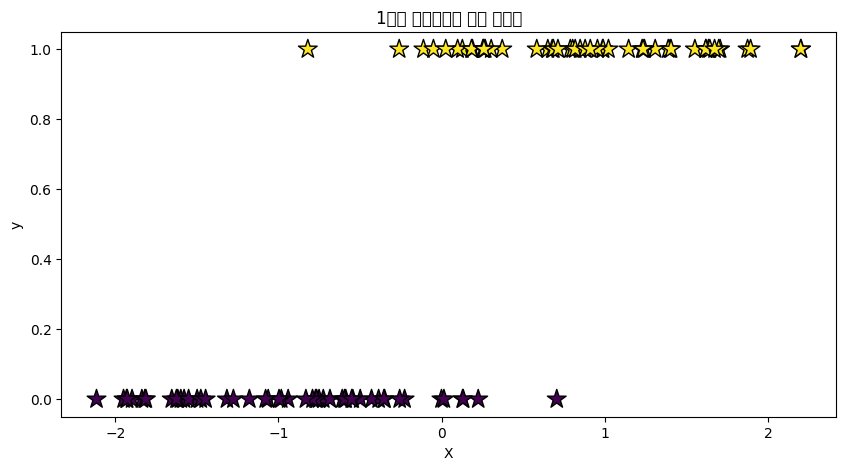

In [ ]:
# 직접 생성한 데이터를 그래프로 그려보자
plt.figure(figsize = (10, 5))
plt.scatter(X, y, marker = '*', c = y, edgecolors = 'k', s = 200)
plt.title('1개의 독립변수를 가진 데이터')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보자.
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)

plt.figure(figsize = (10, 5))

# X[:, 0]: X의 첫번째 feature
# X[:, 1]: X의 두번째 feature
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, edgecolors = 'k', s = 200)
plt.title('2개의 독립변수를 가진 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

KeyboardInterrupt: ignored

In [ ]:
# 클래스당 클러스터 수를 1로 설정해보고 그래프를 그려보자
X1, y1 = make_classification(n_samples = 300, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_clusters_per_class = 1,
                            random_state = 30)
plt.figure(figsize = (10, 5))
plt.scatter(X1[:, 0], X1[:, 1], marker = '*', c = y1, s = 200, edgecolors = 'k')
plt.title('클래스당 1개의 클러스터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

In [ ]:
# 이번에는 클래스당 클러스터 수를 2로 설정해보고 그래프를 그려보자
X1, y1 = make_classification(n_samples = 300, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_clusters_per_class = 2,
                             random_state = 30)
plt.figure(figsize = (10, 5))
plt.scatter(X1[:, 0], X1[:, 1], marker = '*', c = y1, s = 200, edgecolors = 'k')
plt.title('클래스당 2개의 클러스터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

## make_blobs

make_blobs를 이용해 정규분포(가우시안 분포)를 따르는 클러스터링용 가상데이터를 만들 수 있다.

* 주요 parameter:
 - `n_samples` : data의 수, 기본값은 100  
 - `n_features` : feature의 수, 기본값은 2  
 - `centers` : 생성할 클러스터의 수, 기본값은 3  
 - `cluster_std` : 클러스터의 표준편차, 기본값은 1.0  
 - `random_state` : 난수

* 반환값:
 - `X` : [n_samples, n_features] 크기의 배열 
 - `y` : [n_samples] 크기의 배열

참고 : [make_blobs 가이드](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs)


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 10)

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0 ], X[:,1], marker = '*', c = y, s = 200)
plt.title('make_blobs로 생성한 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

## make_moons

make_moons는 초승달 모양을 하고 2개의 클러스터를 가진 데이터를 생성해준다.  
직선으로 사용하여 분류할 수 없는 2차원 이상의 2진분류용 데이터셋을 생성한다.  

* 주요 parameter:
 - `n_samples` : data의 수, 기본값은 100  
 - `noise` : 잡음의 크기(가우즈 노이즈의 표준편차), 기본값은 None
        0이면 정확한 반원을 이룬다. 

* 반환값:
 - `X` : [n_samples, 2] 크기의 배열 
 - `y` : [n_samples] 크기의 배열

참고 : [make_moons 가이드](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html?highlight=make_moons#sklearn.datasets.make_moons)


In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.2, random_state = 10)

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0 ], X[:,1], marker = '*', c = y, s = 200)
plt.title('make_moons로 생성한 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

## make_circles

make_circles는 원 모양을 하는 2개의 클러스터를 가진 데이터를 생성해준다.  
직선으로 사용하여 분류할 수 없는 2차원 이상의 2진분류용 데이터셋을 생성한다.  

* 주요 parameter:
 - `n_samples` : data의 수, 기본값은 100  
 - `noise` : 잡음의 크기(가우즈 노이즈의 표준편차), 기본값은 None
        0이면 정확한 원의 형태를 이룬다.
 - `factor` : 안쪽 원과 바깥쪽 원 사이의 비율, 기본값은 0.8
        0~1 사이의 값을 가지며 작아질 수록 두 원이 구분된다.

* 반환값:
 - `X` : [n_samples, 2] 크기의 배열 
 - `y` : [n_samples] 크기의 배열

참고 : [make_circles 가이드](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)


In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 200, noise = 0.1, factor = 0.5)

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0 ], X[:,1], marker = '*', c = y, s = 200)
plt.title('make_circles로 생성한 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()